# Understanding the Problem

## Defining the problem
When either buying, selling, or exchanging a house, estimating the price could be a tricky task, especially for the average homeowner. Usually, the ask price (set by the seller) is higher than the true worth. Conversely, the bid price (set by the buyer) is typically lower. This creates unfair market conditions leading to either overpriced or underpriced properties.

The traditional approach for estimating a house's value, is to use recent sales prices of neighbouring properties and use it as a benchmark for estimating the property in question. This approach is inaccurate since every property is unique in itself, and the sales prices may not reflect the true worth. Instead, the home's value is determined by its features including location, size, number of rooms, and amenities, just to name a few.

## Setting the Goal
The goal of this project is to build a house price prediction model, which can accurately estimate a property's market worth based on its features, thus resulting in fairer pricing for all parties involved.

## Identifying the type of problem
This is a supervised regression problem, where the target variable is the price of the house, and the features are the characteristics of the house.

# Gathering Data

## About Dataset

The **Paris Housing Dataset** is publicly available on Kaggle, and it contains data on various features of houses in Paris, France, along with their corresponding price values. The dataset is well-suited for solving the target problem, given its good amount of features and many instances.

The dataset contains features such as the number of rooms, floors, area, location, and amenities, among others. These attributes provide valuable insights into the factors that affect the price of a house in Paris. The dataset is in CSV format, which means it can be easily loaded and manipulated with the chosen tools.

## Features Description (Data dictionary)
- **squareMeters** - house size in square meters
- **numberOfRooms** - number of house rooms
- **hasYard** - whether house includes a yard 0 - no, 1 - yes
- **hasPool** - whether house includes a pool 0 - no, 1 - yes
- **floors** - number of floors
- **cityCode** - zip code
- **cityPartRange** - the higher the range, the more exclusive the neighbourhood is
- **numPrevOwners** - number of previous owners
- **made** - year built
- **isNewBuilt** - whether new/renovated 0 - no, 1 - yes
- **hasStormProtector** - whether house is equipped a storm protector 0 - no, 1 - yes
- **basement** - basement size square meters
- **attic** - attic size in square meters
- **garage** - garage size in square meters
- **hasStorageRoom** - whether house includes a storage room  0 - no, 1 - yes
- **hasGuestRoom** - number of guest rooms
- **price** - predicted value

## Importing Libraries

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

## Configuring properties

In [53]:
%matplotlib inline

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)          
pd.set_option('display.max_rows',100)

## Loading the Data

In [54]:
df = pd.read_csv("ParisHousing.csv")

# Inspecting the Dataframe

## Size (Rows, Columns)

In [55]:
df.shape

(10000, 17)

## Preview

In [56]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


## Datatypes

In [57]:
pd.value_counts(df.dtypes)

int64      16
float64     1
Name: count, dtype: int64

**Insight:** Many columns store categorical data, but for the moment have unsuitable datatypes (int64). It is better to convert them to a more suitable datatype (category) for storing categorical data.

Let's first split our features into two predominant categories: **numerical** and **binary** (categorical). This will make it easy to refer to them later on.

In [58]:
# Numerical ratio-scale features
num_features = ['squareMeters', 'numberOfRooms', 'floors', 'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom']
# Binary features
bin_features = ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

Then, we can convert the binary features to the category datatype.

In [59]:
df[bin_features] = df[bin_features].astype('category')

## Columns summary (Describe)

Next, let's look at the five number summary of the numerical features. This will give us a good idea of the distribution of the data.

In [60]:
df[num_features + ['price']].describe()

,squareMeters,numberOfRooms,floors,numPrevOwners,basement,attic,garage,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,5.521700,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,2.856667,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,1.000000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,3.000000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,5.000000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,8.000000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,10.000000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


Lastly, let's look at a sumary of the binary features.

In [61]:
df.describe(include = ["category",])

,hasYard,hasPool,isNewBuilt,hasStormProtector,hasStorageRoom
count,10000,10000,10000,10000,10000
unique,2,2,2,2,2
top,1,0,0,0,1
freq,5087,5032,5009,5001,5030


# Preparing the Data

## Data Cleaning

### Handling missing values
Let's check if there are any missing values in the dataset.

In [62]:
df.isna().any()

squareMeters         False
numberOfRooms        False
hasYard              False
hasPool              False
floors               False
cityCode             False
cityPartRange        False
numPrevOwners        False
made                 False
isNewBuilt           False
hasStormProtector    False
basement             False
attic                False
garage               False
hasStorageRoom       False
hasGuestRoom         False
price                False
dtype: bool

**Insight:** There are no missing values in the dataset.

### Handling outliers
Let's check if there are any outliers in the numerical columns.

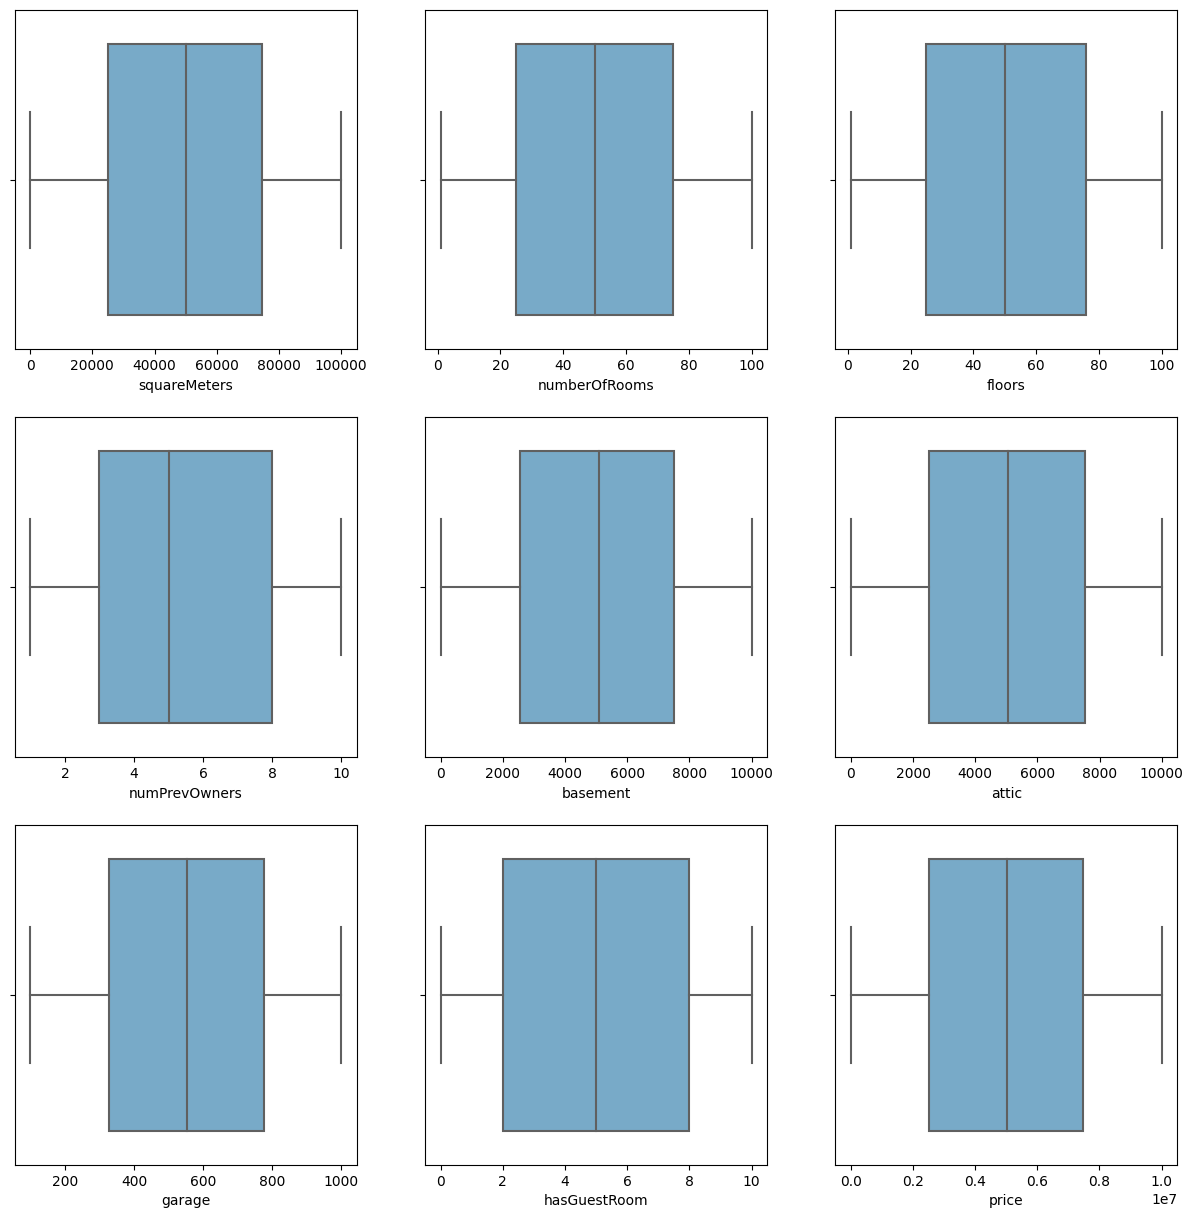

In [63]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(num_features + ['price']):
    sns.boxplot(x=df[col], ax=axes[i//3, i%3], palette="Blues")

**Insight:** There are no apparent outliers in the dataset. There are also no negative (invalid) values in the above columns.

### Handling duplicate rows
Let's now check if there are any duplicate rows in the dataset.

In [64]:
df.duplicated().sum()

0

**Insight:** There are no duplicate rows in the dataset.

### Handling invalid values
Lastly, let's check if there are any invalid values in the dataset. The numerical (quantitative ratio-scaled) columns were already checked for invalid values in the previous section. Let's now check the categorical columns as well as the numerical (quantitative interval-scaled) columns.

First, let's check the binary columns.

In [65]:
for col in bin_features:
    print(col , pd.unique(df[col]))

hasYard [0, 1]
Categories (2, int64): [0, 1]
hasPool [1, 0]
Categories (2, int64): [0, 1]
isNewBuilt [0, 1]
Categories (2, int64): [0, 1]
hasStormProtector [1, 0]
Categories (2, int64): [0, 1]
hasStorageRoom [0, 1]
Categories (2, int64): [0, 1]


**Insight:** There are no invalid values in the binary columns, only binary values (0 and 1).

Let's now look at the other categorical columns (both nominal and ordinal), starting with cityCode.

In [66]:
# City codes (zip codes) in Paris
cityCodes = np.array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75116, 75017, 75018, 75019, 75020])

df['cityCode'].isin(cityCodes).value_counts()[True]

2

**Insight:** Most of the city codes in the dataset are invalid (except for two instances). This makes the cityCode column unusable for our purposes. We will drop this column in the next section.

Let's now check the cityPartRange column.

In [67]:
# City part ranges (arrondissements) in Paris
cityParts = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

df['cityPartRange'].isin(cityParts).sum()

10000

**Insight:** There are no invalid values in the cityPartRange column.

Lastly, Let's look at the quantitative interval-scaled columns.

In [68]:
# check if it contains years that are negative or are more than 4 digits
df['made'].apply(lambda x: len(str(x)) > 4 or x < 0).sum()


0

**Insight:** There are no invalid values in the quantitative interval-scaled columns.

## Data Transformation

### Data Normalization

Since we plan to use Support Vector Regression (SVR) for our model, we need to normalize the data first. This is because SVR is sensitive to the scale of the data, and it is best to scale the data to the same range. We also plan to use Neural Network Regression (NNR) for our model, which also requires the data to be normalized. 

We will use the **StandardScaler** from scikit-learn to normalize the data. This will transform the data such that its distribution will have a mean value 0 and standard deviation of 1. Since we plan to use NNR and Multiple Linear regression, it is a good practise to normalize the target variable as well.

In [69]:
scaler = StandardScaler()
targetScaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df['price'] = targetScaler.fit_transform(df['price'].values.reshape(-1, 1))

Now, let's take a look at the five number summary of the numerical features and target variable after normalization.

In [70]:
df[num_features + ['price']].describe()

,squareMeters,numberOfRooms,floors,numPrevOwners,basement,attic,garage,hasGuestRoom,price
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.167066e-16,-1.122658e-16,3.126388e-17,-1.492140e-17,-2.327027e-17,1.335820e-16,-1.662670e-16,-7.212009e-17,-1.243450e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.730137e+00,-1.712926e+00,-1.705787e+00,-1.582938e+00,-1.749680e+00,-1.736933e+00,-1.729226e+00,-1.572483e+00,-1.731890e+00
25%,-8.609351e-01,-8.800338e-01,-8.749840e-01,-8.827862e-01,-8.598228e-01,-8.693323e-01,-8.600737e-01,-9.428096e-01,-8.608983e-01
50%,8.180215e-03,-1.243786e-02,-9.564616e-03,-1.826346e-01,2.064812e-02,5.870179e-03,3.353724e-03,1.700117e-03,7.900786e-03
75%,8.598225e-01,8.551581e-01,8.904716e-01,8.675929e-01,8.614887e-01,8.681156e-01,8.553324e-01,9.462098e-01,8.604115e-01
max,1.742223e+00,1.722754e+00,1.721274e+00,1.567745e+00,1.726664e+00,1.717922e+00,1.705403e+00,1.575883e+00,1.742383e+00


**Insight:** The data is now normalized, with a mean value of 0 (approximately) and standard deviation of 1.

### Data Encoding
While our learning algorithms of interest require the data to be in numerical format, categorical features need to be encoded first. Luckily, our categorical features are already in the appropriate format, so no further encoding is required.

## Feature Engineering

### Data Integration
In our initial approach, we planned to integrate new features into the dataset that are specific to the cityPartRange (arrondissement). These include crime rate, pollution rate, school rating, public transportation accessibility, and so on. However, we were unable to find a suitable dataset for this purpose that includes a granularity of city parts rather than the city as a whole. Therefore, we will not be integrating any new features from external sources into the dataset.

### Creating new features
First things first, let's create a new feature called **propertyAge** by subtracting the **made** column from the current year. This will give us the age of the property in years. 

The primary reason for this transformation is interpretability. It's often more intuitive to think about a property's age rather than the year it was built. For example, a coefficient for "propertyAge" in a regression model directly communicates how the value of the property changes for each additional year of age, which is easier to understand and communicate than a coefficient for "made" (year built).

In addition, "made" is an absolute measure, while "age of property" is a relative measure that automatically adjusts for the current year. This can be beneficial for our purposes.

In [71]:
df['propertyAge'] = pd.Timestamp.now().year - df['made']
df['propertyAge'].describe()

count    10000.00000
mean        17.51150
std          9.30809
min          2.00000
25%          9.00000
50%         17.50000
75%         26.00000
max         33.00000
Name: propertyAge, dtype: float64

This new feature needs to be normalized as well, so let's do that.

In [72]:
df['propertyAge'] = scaler.fit_transform(df[['propertyAge']])
df['propertyAge'].describe()

count    1.000000e+04
mean    -1.726619e-16
std      1.000050e+00
min     -1.666537e+00
25%     -9.144654e-01
50%     -1.235546e-03
75%      9.119943e-01
max      1.664066e+00
Name: propertyAge, dtype: float64

**Insight:** The propertyAge feature is now normalized, with a mean value of 0 (approximately) and standard deviation of 1.

Next, we need to add propertyAge to our numerical features list.

In [73]:
num_features.append('propertyAge')

And last but not least, let's drop the made column from the dataset.

In [74]:
df.drop('made', axis=1, inplace=True)

While we are at it, let's change the label of hasGuestRoom to NumGuestRooms (Number of Guest Rooms) to make it more intuitive. As this feature is numerical rather than binary.

In [75]:
df.rename(columns={'hasGuestRoom': 'numGuestRooms'}, inplace=True)
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'numGuestRooms', 'price', 'propertyAge'],
      dtype='object')

Let's also update the numerical features list.

In [76]:
num_features[num_features.index('hasGuestRoom')] = 'numGuestRooms'
num_features

['squareMeters',
 'numberOfRooms',
 'floors',
 'numPrevOwners',
 'basement',
 'attic',
 'garage',
 'numGuestRooms',
 'propertyAge']

### Dimensionality reduction
Let's start by dropping the cityCode column, since it contains mostly invalid values.

In [77]:
df.drop('cityCode', axis=1, inplace=True)

Now, let's check the correlation between the numerical columns.

<Axes: >

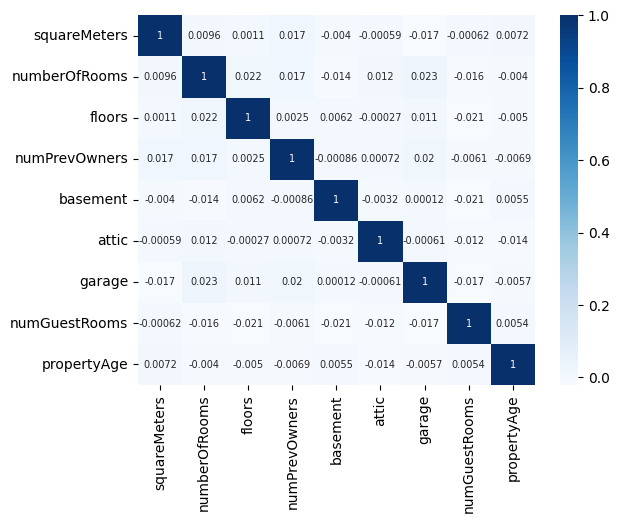

In [78]:
sns.heatmap(df[num_features].corr(), cmap="Blues",annot=True, annot_kws={"size": 7})

**Insight:** There is no strong correlation between any of the numerical columns. This means that we can keep all of them in the dataframe.

On the same note, let's check the correlation between the numerical columns and the target variable.

<Axes: >

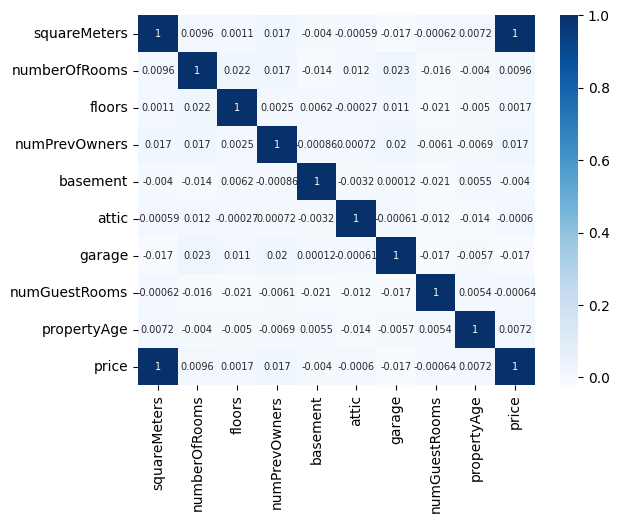

In [79]:
# check correlation with target variable price with heatmap
sns.heatmap(df[num_features + ['price']].corr(), cmap="Blues",annot=True, annot_kws={"size": 7})

**Insight:** there is a strong correlation between squareMeters and price, which is expected. Other than that, there is no strong correlation between any of the other numerical columns and price.

## Data Splitting
We will split the data into training and testing sets using the **train_test_split** function from scikit-learn. We will use a 80/20 split, with 80% of the data for training and 20% for testing.

First, let's separate our features from the target variable.

In [81]:
target = df['price']
features = df.drop('price', axis=1, inplace=False)
features.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityPartRange', 'numPrevOwners', 'isNewBuilt', 'hasStormProtector',
       'basement', 'attic', 'garage', 'hasStorageRoom', 'numGuestRooms',
       'propertyAge'],
      dtype='object')

Then, let's split the data into training and testing sets.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

X_train.shape, X_test.shape

((8000, 15), (2000, 15))

# Modeling

## Selecting the algorithms
We will use the following algorithms for our model:
* Multiple Linear Regression
* Random Forest Regression (RFR)
* Support Vector Regression (SVR)
* Neural Network Regression (NNR)

## Deciding on a measure of success
We will use the **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** as our measures of success. This is because they are easy to interpret as they are in the same units as the target variable (in this case, price). However, the MAE is more robust to outliers than the RMSE, and the RMSE gives a higher weight to large errors. Therefore, we will use both of them to evaluate our models. For further interprebility, we will also use the **Mean Absolute Percentage Error (MAPE)**, which gives us the error as a percentage of the actual value. 

## Defining helper functions
Let's start with a function that will help us calculate the metrics for each model.

In [83]:
def getScore(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return round(mae, 2), round(rmse, 2), round(mape*100, 2)

Let's also define a function that will help us print the metrics in a nice format.

In [84]:
def printScores(scores, name, type):
    print("{} - {} set".format(name, type))
    print("MAE: {}".format(scores[0]))
    print("RMSE: {}".format(scores[1]))
    print("MAPE: {}".format(scores[2]))

Next, since our target variable is normalized, we need to convert the predictions back to the original scale. We will define a function that uses the inverse_transform method of the StandardScaler class to do this.

In [85]:
def descale(y_pred, y_true):
    y_pred_descaled = targetScaler.inverse_transform(y_pred.reshape(-1, 1))
    y_true_descaled = targetScaler.inverse_transform(y_true.values.reshape(-1, 1))
    return y_pred_descaled, y_true_descaled

Lastly, let's define a function that will help us get predictions and evaluate the model. We will also store the scores for easy comparison later.

In [86]:
train_scores = {'Model': [], 'MAE': [], 'RMSE': [], 'MAPE': []}
test_scores = {'Model': [], 'MAE': [], 'RMSE': [], 'MAPE': []}

def getPredictions(model, X, y, name, type='train'):
    y_pred = model.predict(X)
    y_pred_descaled, y_true_descaled = descale(y_pred, y)
    scores = getScore(y_true_descaled, y_pred_descaled)
    if type == 'train':
        train_scores['Model'].append(name)
        train_scores['MAE'].append(scores[0])
        train_scores['RMSE'].append(scores[1])
        train_scores['MAPE'].append(scores[2])
    else:
        test_scores['Model'].append(name)
        test_scores['MAE'].append(scores[0])
        test_scores['RMSE'].append(scores[1])
        test_scores['MAPE'].append(scores[2])
    printScores(scores, name, type)
    return y_pred_descaled

We are all set to start training our models!

## Training the models

### Multiple Linear Regression

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = getPredictions(lr, X_train, y_train, "Multiple Linear Regression")

Multiple Linear Regression - train set
MAE: 1470.81
RMSE: 1891.07
MAPE: 0.1


### Random Forest Regression (RFR)

In [88]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred_train = getPredictions(rfr, X_train, y_train, "Random Forest Regression")

Random Forest Regression - train set
MAE: 1148.77
RMSE: 1446.05
MAPE: 0.08


### Support Vector Regression (SVR)

In [89]:
svr = SVR(kernel='rbf', gamma='auto')
svr.fit(X_train, y_train)

y_pred_train = getPredictions(svr, X_train, y_train, "Support Vector Regression")

Support Vector Regression - train set
MAE: 143684.28
RMSE: 171835.16
MAPE: 12.47


### Neural Network Regression (NNR)

In [90]:
nnr = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
nnr.fit(X_train, y_train)

y_pred_train = getPredictions(nnr, X_train, y_train, "Neural Network Regression")

Neural Network Regression - train set
MAE: 71864.98
RMSE: 89300.55
MAPE: 5.67


### Gradient Boosting Regression (GBR)
Altough we did not plan to use Gradient Boosting Regression (GBR) for our model, we decided to give it a try after seeing the results of the other models. We will use the **GradientBoostingRegressor** class from scikit-learn to train our model.

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

y_pred_train = getPredictions(gbr, X_train, y_train, "Gradient Boosting Regression")

Gradient Boosting Regression - train set
MAE: 14713.89
RMSE: 19557.61
MAPE: 0.71


## Evaluating the models

### Multiple Linear Regression

In [92]:
y_pred_test = getPredictions(lr, X_test, y_test, "Multiple Linear Regression", type="test")

Multiple Linear Regression - test set
MAE: 1509.3
RMSE: 1922.3
MAPE: 0.09


**Insights:** The MAE and RMSE are very low considering that mean price is 5 million. This means that the model is able to predict the price of a property with a high degree of accuracy. The MAPE is also low, which means that on average we are only off by 0.09% of the actual price. This is a very good result, and we can conclude that the model is a good fit for the data.

### Random Forest Regression (RFR)

In [93]:
y_pred_test = getPredictions(rfr, X_test, y_test, "Random Forest Regression", type="test")

Random Forest Regression - test set
MAE: 3167.84
RMSE: 3972.11
MAPE: 0.24


**Insights:** Here again, the MAE and RMSE are very low. The MAPE is also low, on average we are only off by 0.24% of the actual price. Of course, the Multiple Linear Regression model is slightly better, but considering that the MAPE is already very low (less than 1%), we can conclude that the model is a good fit for the data.

### Support Vector Regression (SVR)

In [94]:
y_pred_test = getPredictions(svr, X_test, y_test, "Support Vector Regression", type="test")

Support Vector Regression - test set
MAE: 168039.08
RMSE: 224916.35
MAPE: 21.69


**Insights:** The MAE and RMSE are acceptable while considering that the mean price of is 5 millions. However, the MAPE tells use that on average we are off by 21.69% of the actual price. This is not a helpful result for our purposes, and we can conclude that the model is not a good fit for the data.

### Neural Network Regression (NNR)

In [95]:
y_pred_test = getPredictions(nnr, X_test, y_test, "Neural Network Regression", type="test")

Neural Network Regression - test set
MAE: 81665.36
RMSE: 104629.96
MAPE: 6.29


**Insights:** Although the MAE and RMSE look slightly higher than the other models, the MAPE is low, on average we are only off by 6.29% of the actual price. This is acceptable result (less than 10%), one that could be useful for our purposes.

### Gradient Boosting Regression (GBR)

In [96]:
y_pred_test = getPredictions(gbr, X_test, y_test, "Gradient Boosting Regression", type="test")

Gradient Boosting Regression - test set
MAE: 15221.41
RMSE: 20131.16
MAPE: 0.78


**Insights:** The MAE and the RMSE are low compared to the mean property price. Also, according to the MAPE, on average we only of by 0.78% of the actual price. This is a very good result, and we can conclude that the model is a good fit for the data.

## Comparing the models
Let's compare the models based on the MAE, RMSE, and MAPE.

First, let's plot the MAE on the test set for each model.

<Axes: xlabel='MAE', ylabel='Model'>

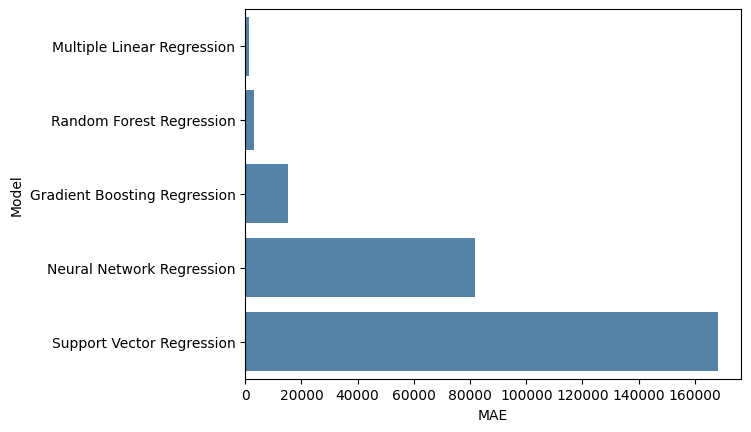

In [97]:
test_scores = pd.DataFrame(test_scores)
sns.barplot(x='MAE', y='Model', data=test_scores.sort_values(by='MAE', ascending=True), color='steelblue')

Next, let's plot the RMSE on the test set for each model.

<Axes: xlabel='RMSE', ylabel='Model'>

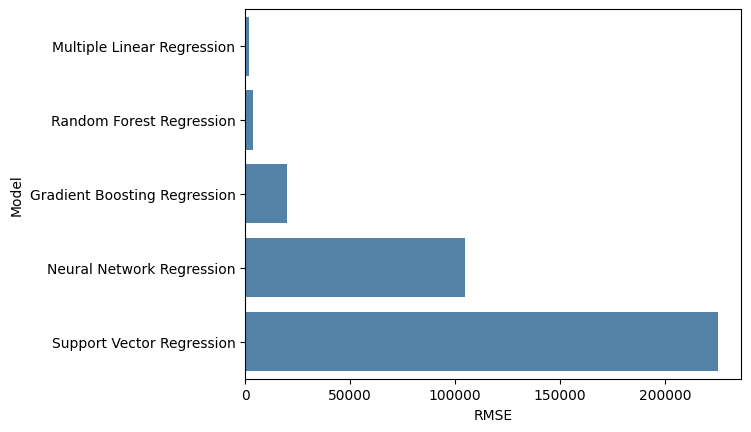

In [98]:
sns.barplot(x='RMSE', y='Model', data=test_scores.sort_values(by='RMSE', ascending=True), color='steelblue')

**Insight:** We can see that outliers do not have a significant effect since the values between the two metrics are very close. This validates the outlier treatment we performed in earlier sections.

Finally, let's plot the MAPE on the test set for each model.

<Axes: xlabel='MAPE', ylabel='Model'>

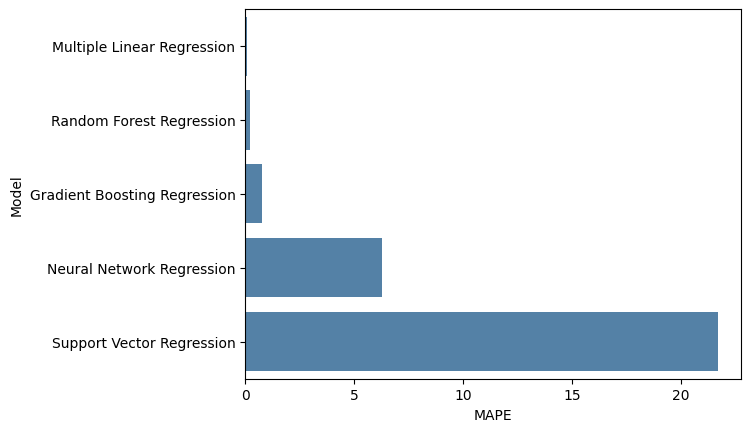

In [99]:
sns.barplot(x='MAPE', y='Model', data=test_scores.sort_values(by='MAPE', ascending=True), color='steelblue')

**Insights:** We can conclude that the Multiple Linear Regression model is the best fit for the data, followed by the Random Forest Regression model and the Gradient Boosting Regression model, which are all highly accurate and are or average off by less than 1%. The Neural Network Regression model also gives good results, with an average error of less than 10%. However, the Support Vector Regression model is not very accurate but gives reasonable results, with an average error of more than 20%.

# Deployment
Here's how we can to make our model accessible to the users:

* **Personal Use** (Web App): A user-friendly web application can be developed where homeowners can input the relevant features of their property, such as size, location, age, etc. After entering the information, the model will predict and display the estimated property value. This empowers homeowners to make informed decisions about whether to sell, buy or exchange their properties. Technologies like Flask or Django can be used in combination with HTML/CSS/JavaScript to develop the web application.

* **Business Use** (API): For businesses such as real estate agencies and property listing websites, providing access to the model via an API is highly beneficial. Agencies can integrate the API into their existing platforms or tools. When the property data is sent to the API, the model will return an estimated value which can assist agents to align with the market value, reduce human errors and speed up the estimation process. This also adds value to property listing platforms by automatically suggesting a selling/buying price, enhancing the user experience and potentially increasing revenues. Flask, Django or FastAPI can be used to develop the API.

# Conclusion
In this project, we built a model to predict the price of properties in the city of Paris. We used data from a curated dataset on Kaggle, which contained information about properties sold in Paris as well as their features and amenities. We performed exploratory data analysis to understand the data and prepare it for modeling. We then trained and evaluated five different models: Multiple Linear Regression, Random Forest Regression, Support Vector Regression, Neural Network Regression, and Gradient Boosting Regression. We compared the models based on the MAE, RMSE, and MAPE. We concluded that the Multiple Linear Regression model is the best fit for the data, followed by the Random Forest Regression model and the Gradient Boosting Regression model, which are all highly accurate and are or average off by less than 1%. The Neural Network Regression model also gives good results, with an average error of less than 10%. However, the Support Vector Regression model is not very accurate but gives reasonable results, with an average error of more than 20%.